In [109]:
import pandas as pd

filepath2019 = "C:\\Users\\orndo\\OneDrive\\Desktop\VSCode\\SToPA\\data\\schererville\\2019.csv"
filepath2020 = "C:\\Users\\orndo\\OneDrive\\Desktop\\VSCode\\SToPA\\data\\schererville\\2020.csv"
filepath2021 = "C:\\Users\\orndo\\OneDrive\\Desktop\\VSCode\\SToPA\\data\\schererville\\2021.csv"
filepath2022 = "C:\\Users\\orndo\\OneDrive\\Desktop\\VSCode\\SToPA\\data\\schererville\\2022.csv"

csv2019 = pd.read_csv(filepath2019)
csv2020 = pd.read_csv(filepath2020)
csv2021 = pd.read_csv(filepath2021)
csv2022 = pd.read_csv(filepath2022)

schererville = pd.concat([csv2019, csv2020, csv2021, csv2022], ignore_index=True)
schererville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42208 entries, 0 to 42207
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 42208 non-null  object 
 1   Division/District      0 non-null      float64
 2   Officer                42208 non-null  object 
 3   Court                  30917 non-null  object 
 4   UTTNumber              42208 non-null  object 
 5   OffenseDateTime        42208 non-null  object 
 6   IsWarning              42208 non-null  object 
 7   IsVoided               42208 non-null  object 
 8   OffenderNameLast       42208 non-null  object 
 9   OffenderNameFirst      42208 non-null  object 
 10  OffenderNameMI         35578 non-null  object 
 11  OffenderDOB            42208 non-null  object 
 12  OffenderRace           39604 non-null  object 
 13  OffenderEthnicity      35888 non-null  object 
 14  OffenderGender         42208 non-null  object 
 15  Of

In [110]:
# Boolean filtering
non_traffic_schrereville = schererville[schererville['ProjectCode'] == "NON TRAFFIC - NON TRAFFIC RELATED OFFENSES"]

# Modify values based on the condition
condition = non_traffic_schrereville['OffenderEthnicity'] == 'Hispanic'
non_traffic_schrereville.loc[condition, 'OffenderRace'] = 'HISPANIC'

In [111]:
# Drop rows with duplicate values in the 'UTTNumber' column
non_traffic_schrereville = non_traffic_schrereville.drop_duplicates(subset='UTTNumber', keep='first')

result = non_traffic_schrereville.groupby('Officer')['OffenderRace'].value_counts().unstack(fill_value=0)
result.reset_index(inplace=True)

# Split the 'Officer' column by comma and take the first part
result['Officer'] = result['Officer'].str.split(',').str[0]
result['NON_WHITE'] = result['ASIAN / PACIFIC ISLANDER'] + result['HISPANIC'] + result['BLACK']

result['TOTAL'] = result['NON_WHITE'] + result['WHITE']
result['NON_WHITE_RATE'] = result['NON_WHITE'] /(result['TOTAL'])

print(result)

OffenderRace       Officer  ASIAN / PACIFIC ISLANDER  BLACK  HISPANIC  \
0                  ALVAREZ                         0     11         1   
1                ARVANITIS                         0     36        19   
2                 ASCENCIO                         1     12         6   
3             BEEMSTERBOER                         0      0         0   
4               BERMINGHAM                         0      8         2   
5                 BERTOSSI                         0      1         2   
6                   BIELLA                         0      7         1   
7                     BORK                         0      1         0   
8                  DANIELS                         0      7         0   
9              DJORDJEVICH                         0      8         6   
10                    EGER                         0     17         3   
11                GALLIHER                         0      5         2   
12                 GERBICK                         

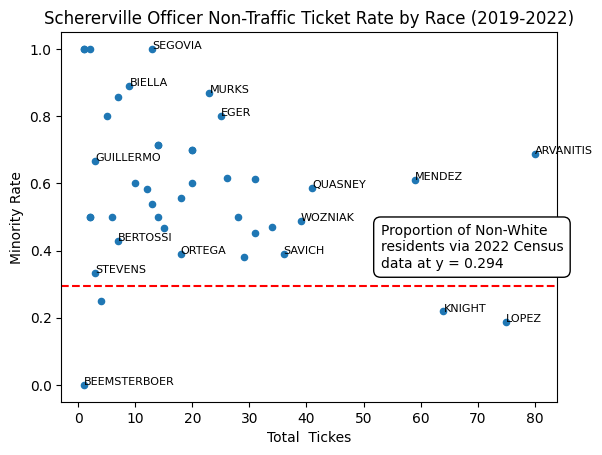

In [112]:
import matplotlib.pyplot as plt

# Scatter plot with labels
ax = result.plot.scatter(x='TOTAL', y='NON_WHITE_RATE', title='Schererville Officer Non-Traffic Ticket Rate by Race (2019-2022)')

# Annotate points with officer names
for i, row in result.iterrows():
    if row['Officer'] in ['QUASNEY', 'ORTEGA', 'STEVENS', 'BERTOSSI','BIELLA','EGER','GUILLERMO','ARVANITIS', 'MENDEZ', 'WOZNIAK', 'LOPEZ', 'KNIGHT', 'MURKS', 'SEGOVIA', 'BEEMSTERBOER', 'ORTEGA', 'SAVICH']:
        ax.annotate(row['Officer'], (row['TOTAL'], row['NON_WHITE_RATE']), fontsize= 8)

# Add a red line at y = 0.294
ax.axhline(y=0.294, color='red', linestyle='--')

# Add a narrative panel on the right
ax.text(53, .35, 'Proportion of Non-White\nresidents via 2022 Census\ndata at y = 0.294', fontsize=10, color='black', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Add custom labels to the x-axis and y-axis
ax.set_xlabel('Total  Tickes')
ax.set_ylabel('Minority Rate')

# Show the plot
plt.show()